### Dataset

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
complaints_source_df = pd.read_csv('../data/complaints.csv', delimiter=',')
complaints_source_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


In [107]:
complaints_df = complaints_source_df
complaints_source_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485696,05/17/15,Debt collection,Payday loan,False statements or representation,Impersonated an attorney or official,This account was a payday loan from the XXXX X...,None,Second Round Limited Partnership,ID,836XX,Older American,Consent provided,Web,05/17/15,Closed,Yes,No,1379809
485697,09/03/15,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,We had a mortgage with XXXX that was discharge...,None,"Seterus, Inc.",MD,210XX,None,Consent provided,Web,09/03/15,Closed with explanation,Yes,No,1550485
485698,03/12/16,Consumer Loan,Vehicle loan,Managing the loan or lease,None,I have 2003 XXXX financed through United Auto ...,None,United PanAm Financial Corp.,TX,750XX,None,Consent provided,Web,03/12/16,Closed with non-monetary relief,Yes,No,1829587
485699,07/11/16,Consumer Loan,Vehicle loan,Managing the loan or lease,None,I was on automatic payment for my car loan. In...,None,NISSAN MOTOR ACCEPTANCE CORPORATION,IL,607XX,None,Consent provided,Web,07/11/16,Closed with explanation,Yes,No,2007463


In [108]:
complaints_df = complaints_source_df[['Product', 'Consumer complaint narrative', 'Company', 'State', 'Company response to consumer','Complaint ID']].copy()
complaints_df.columns = ['Product', 'Narrative', 'Company', 'State', 'Response','Complaint ID'] 
complaints_df.head()
complaints_df.replace({'Company response to consumer': {'Closed': 'Closed without explanation'}}, inplace= True)
complaints_df.replace({'Response': {'Closed': 'Closed without explanation'}}, inplace= True)
complaints_df = complaints_df[complaints_df['Response'].isin(['Closed with non-monetary relief',
                                                              'Closed with monetary relief', 'Closed with explanation',
                                                              'Closed without explanation', 'Untimely response'])]

In [109]:
complaints_df

,Product,Narrative,Company,State,Response,Complaint ID
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,3315279
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,3319487
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,3262794
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,3295208
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,3306130
...,...,...,...,...,...,...
485696,Debt collection,This account was a payday loan from the XXXX X...,Second Round Limited Partnership,ID,Closed without explanation,1379809
485697,Mortgage,We had a mortgage with XXXX that was discharge...,"Seterus, Inc.",MD,Closed with explanation,1550485
485698,Consumer Loan,I have 2003 XXXX financed through United Auto ...,United PanAm Financial Corp.,TX,Closed with non-monetary relief,1829587
485699,Consumer Loan,I was on automatic payment for my car loan. In...,NISSAN MOTOR ACCEPTANCE CORPORATION,IL,Closed with explanation,2007463


### State

We bepalen of de geografische locatie, waar de klacht oorspronklijk vandaan komt, een invloed heeft op het uiteindelijke resultaat. 
Aangezien de staat wordt opgeslaan onder zijn afkorting hebben we een table nodig die de afkorting als key heeft, en ons de corresponderende staat en regio teruggeeft.
Deze table is gegenereerd via https://statetable.com/.

In [119]:
state_table_df = pd.read_csv('./state_table.csv', delimiter=',')
state_table_df.head()
state_table_df = state_table_df.replace({np.nan: 'unknown'})
state_table_df['census_region_name'].unique()

array(['South', 'West', 'Northeast', 'Midwest', 'unknown'], dtype=object)

Nu de verschillende regio's bekend zijn kan er worden opzocht hoeveel inwoners er in elke staat en regio aanwezig zijn. 

In [135]:
# population https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295
state_pop_df = pd.read_csv('./state_population.csv', delimiter=',')
state_pop_df.head()
region_pop_df = pd.read_csv('./region_population.csv', delimiter=',')
region_pop_df.head()

,Region,Population
0,Northeast,55982803
1,Midwest,68329004
2,South,125580448
3,West,78347268


Door middel van deze functies kunnen we de staat vertalen naar de regio waarin hij ligt, en opzoeken hoeveel inwoners er in deze regio aanwezig zijn.

In [136]:
state_table_df['census_region_name'].unique()

array(['South', 'West', 'Northeast', 'Midwest', 'unknown'], dtype=object)

In [137]:
def give_region(abbr):
    abbr = str(abbr)
    row = state_table_df.loc[state_table_df['abbreviation'] == abbr]
    region = row['census_region_name'].values
    if region.size == 0:
        return 'unknown'
    else:
        return region[0]
    
def give_region_population(region):
    region = str(region)
    row = region_pop_df.loc[region_pop_df['Region'] == region]
    pop = row['Population'].values
    if pop.size == 0:
        return 0.0
    else:
        return pop[0]

Bovenstaande functies worden gebruikt om de regios toe te voegen aan de complaints dataframe.

In [123]:
import swifter
df_state = complaints_df['State']
complaints_df['Region'] = df_state.swifter.apply(give_region)

In [138]:
complaints_df["Region"].unique()

,Product,Narrative,Company,State,Response,Complaint ID,Region
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,3315279,West
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,3319487,South
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,3262794,South
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,3295208,South
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,3306130,Northeast
...,...,...,...,...,...,...,...
485696,Debt collection,This account was a payday loan from the XXXX X...,Second Round Limited Partnership,ID,Closed without explanation,1379809,West
485697,Mortgage,We had a mortgage with XXXX that was discharge...,"Seterus, Inc.",MD,Closed with explanation,1550485,South
485698,Consumer Loan,I have 2003 XXXX financed through United Auto ...,United PanAm Financial Corp.,TX,Closed with non-monetary relief,1829587,South
485699,Consumer Loan,I was on automatic payment for my car loan. In...,NISSAN MOTOR ACCEPTANCE CORPORATION,IL,Closed with explanation,2007463,Midwest


In [139]:
complaints_df.head()

,Product,Narrative,Company,State,Response,Complaint ID,Region
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,3315279,West
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,3319487,South
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,3262794,South
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,3295208,South
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,3306130,Northeast


Eenmaal het aantal complaints bekend zijn kunnen we de kans berekenen dat een bepaalde response in een bepaalde regio voorkomt door de invoer van het totale bewonersaantal.

In [140]:
region_df = pd.DataFrame(complaints_df.groupby(['Region','Response']).size())
region_df.reset_index(inplace=True)
region_df.columns = ['Region','Response','Complaints'] 
region_df['Population'] = region_df['Region'].swifter.apply(give_region_population)
region_df['Chance'] = region_df['Complaints']/region_df['Population']*100
ret = pd.DataFrame(complaints_df.groupby(['Region','Response']).size())
ret['Chance'] = region_df['Chance']

In [141]:
complaints_df['Region'].unique()

array(['West', 'South', 'Northeast', 'Midwest', 'unknown'], dtype=object)

In [142]:
region_df

,Region,Response,Complaints,Population,Chance
0,Midwest,Closed with explanation,60435,68329004.0,0.088447
1,Midwest,Closed with monetary relief,4069,68329004.0,0.005955
2,Midwest,Closed with non-monetary relief,9242,68329004.0,0.013526
3,Midwest,Closed without explanation,579,68329004.0,0.000847
4,Midwest,Untimely response,515,68329004.0,0.000754
5,Northeast,Closed with explanation,62012,55982803.0,0.110770
6,Northeast,Closed with monetary relief,5584,55982803.0,0.009974
7,Northeast,Closed with non-monetary relief,9150,55982803.0,0.016344
8,Northeast,Closed without explanation,592,55982803.0,0.001057
9,Northeast,Untimely response,392,55982803.0,0.000700


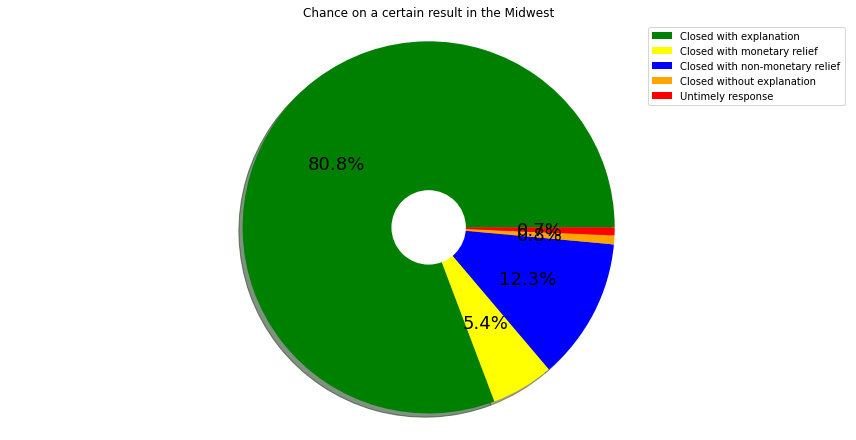

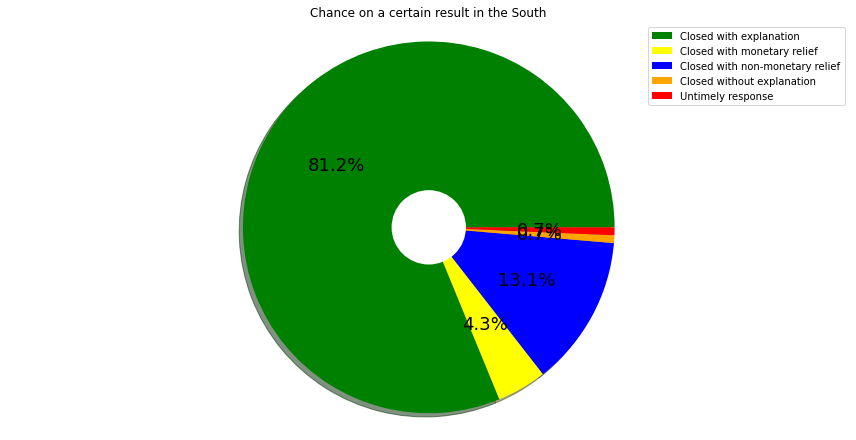

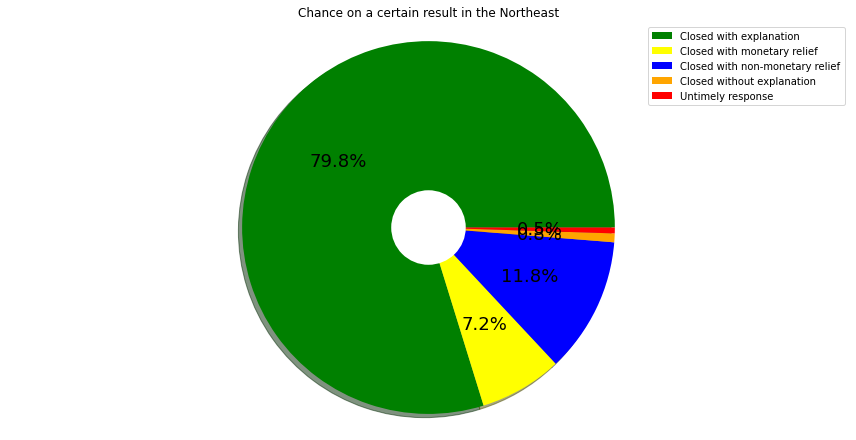

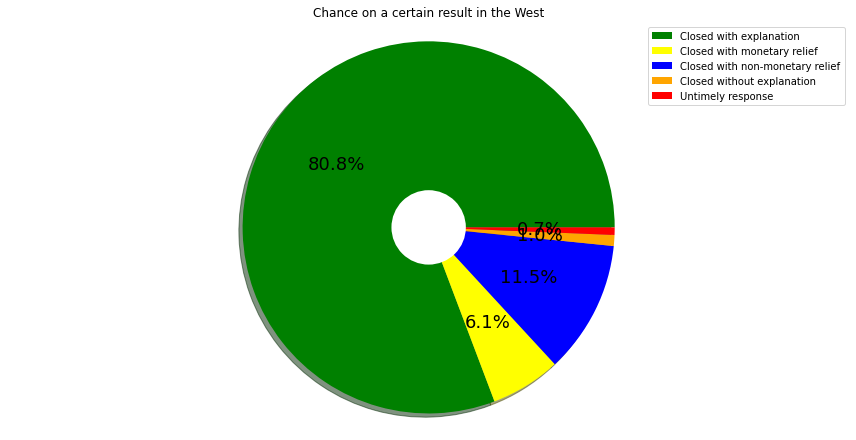

In [143]:

def plot(region):   
    onereg_df = region_df.loc[region_df['Region'] == region]
    sizes = onereg_df['Complaints'].tolist()
    labels = onereg_df['Response'].tolist()
    colors = ['green', 'yellow', 'blue', 'orange','red','grey','black']
    fig1, ax1 = plt.subplots(figsize=(12,6))   
    flavor_pie = ax1.pie(sizes, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 18})
    
    centre_circle = plt.Circle((0,0),0.20,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    ax1.set_title("Chance on a certain result in the " + region)
    plt.legend(labels)


    return plt
plot("Midwest").show()   
plot("South").show() 
plot("Northeast").show() 
plot("West").show() 

In [144]:
region_df = region_df.replace([np.inf, -np.inf,np.nan], 0.0)

In [145]:
region_df

,Region,Response,Complaints,Population,Chance
0,Midwest,Closed with explanation,60435,68329004.0,0.088447
1,Midwest,Closed with monetary relief,4069,68329004.0,0.005955
2,Midwest,Closed with non-monetary relief,9242,68329004.0,0.013526
3,Midwest,Closed without explanation,579,68329004.0,0.000847
4,Midwest,Untimely response,515,68329004.0,0.000754
5,Northeast,Closed with explanation,62012,55982803.0,0.110770
6,Northeast,Closed with monetary relief,5584,55982803.0,0.009974
7,Northeast,Closed with non-monetary relief,9150,55982803.0,0.016344
8,Northeast,Closed without explanation,592,55982803.0,0.001057
9,Northeast,Untimely response,392,55982803.0,0.000700


Hieruit kunnen we besluiten dat de reacties in de verschillende regio's verschillen. Tussen het noort oosten en het zuiden merken we bijna een verdubbeling op van het aantal complaints die positief zijn afgesloten door het verkijgen van een geldsom.

In [146]:
import numpy
x= region_df['Chance'].unique()
x = x[~numpy.isnan(x)]
ratio = 1/sum(x)
def change_ratio(value):
    return ratio*value
region_df['Chance'] = region_df['Chance'].swifter.apply(change_ratio)

In [147]:
region_df['Chance'].unique()

array([0.15625065, 0.01052013, 0.02389457, 0.00149697, 0.0013315 ,
       0.19568588, 0.01762094, 0.02887386, 0.00186812, 0.001237  ,
       0.24548037, 0.01305603, 0.03966327, 0.0020426 , 0.00205104,
       0.20910427, 0.01579962, 0.02987655, 0.00246002, 0.00168662,
       0.        ])

Bovenstaande kansen toevoegen aan de complaints dataframe.  Per rij worden alle kansen van die regio opgenomen.

In [148]:
# #De responses pivoteren tot kolommen
gepivoteerd = region_df.pivot_table('Chance', ['Region'], 'Response')
#De kolommen opnieuw ordenen van meest naar minst voorkomend
gepivoteerd = gepivoteerd.reindex(['Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief',
                                   'Closed without explanation', 'Untimely response'], axis=1).reset_index()
#De complaints mergen met de percentages om een duidelijk overzicht te bekomen
merged_df = pd.merge(complaints_df, gepivoteerd, on='Region', how='left')
# merged_df
complaints_df["Region"].unique()
region_df["Region"].unique()

array(['Midwest', 'Northeast', 'South', 'West', 'unknown'], dtype=object)

In [149]:
merged_df['Closed with explanation'].unique()
np.isnan( merged_df['Closed with explanation'] ).all()

False

In [150]:
row = merged_df.loc[merged_df['Closed with explanation'] == np.nan]
row

,Product,Narrative,Company,State,Response,Complaint ID,Region,Closed with explanation,Closed with non-monetary relief,Closed with monetary relief,Closed without explanation,Untimely response


In [151]:
merged_df.to_csv(r'../data/complaints_with_region_ratio.csv', index = False)

### SVM

In [215]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns 
from matplotlib import rcParams

%matplotlib inline
from sklearn.model_selection import train_test_split


train, test = train_test_split(complaints_source_df, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(list(complaints_df["Chance"]),list(complaints_df["Response"]), random_state=42)


In [216]:
from sklearn.decomposition import PCA

pca = PCA( whiten=False)
train_features = pca.fit_transform(np.asarray(X_train).reshape(-1, 1))
test_features = pca.transform(np.asarray(X_test).reshape(-1, 1))

print(train_features.shape)
print(test_features.shape)

(37500, 1)
(12500, 1)


In [221]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.LinearSVC()
classifier.fit(train_features, Y_train)
test_predictions = classifier.predict(test_features)
print(accuracy_score(test_predictions, Y_test))

0.94184


In [219]:
complaints_df['Response'].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Untimely response', 'Closed',
       'In progress'], dtype=object)

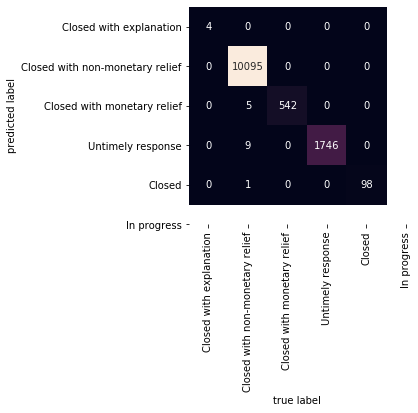

In [220]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_predictions, Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=complaints_df['Response'].unique(),
            yticklabels=complaints_df['Response'].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');